In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

In [2]:
df = pd.read_csv("/Users/vedanta/Documents/VSCode/ipd/labeled_data.csv")

In [3]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
df.head
df.shape

(24783, 7)

In [5]:
df2=df.rename(columns={'class':'Score','Unnamed: 0':'id'})

In [6]:
df2.drop(['count','hate_speech','offensive_language','neither'],axis=1,inplace=True)


In [7]:
df2

,id,Score,tweet
0,0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...
24778,25291,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,1,youu got wild bitches tellin you lies


(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

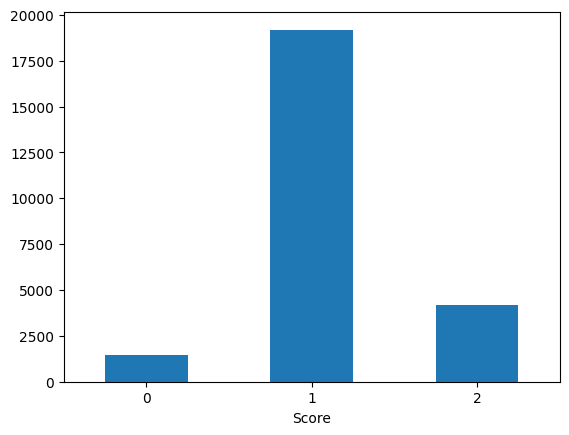

In [8]:
df2['Score'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)

In [9]:
char_to_remove = ['!','@',';',':','RT','#','*']


In [10]:
for char in char_to_remove:
    df2['tweet'] = df2['tweet'].str.replace(char, '')


In [11]:
df2

,id,Score,tweet
0,0,2,mayasolovely As a woman you shouldn't compla...
1,1,1,mleew17 boy dats cold...tyga dwn bad for cuf...
2,2,1,UrKindOfBrand Dawg 80sbaby4life You ever fu...
3,3,1,C_G_Anderson viva_based she look like a tranny
4,4,1,ShenikaRoberts The shit you hear about me mi...
...,...,...,...
24778,25291,1,you's a muthafin lie &8220LifeAsKing 20_Pearls...
24779,25292,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,1,young buck wanna eat.. dat nigguh like I aint ...
24781,25295,1,youu got wild bitches tellin you lies


Understanding NLTK

In [12]:
from tqdm.notebook import tqdm

In [30]:
example = df2['tweet'][50]
example

'" we dont trust these niggas all these bitches "'

In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [32]:
sia = SentimentIntensityAnalyzer()

In [33]:
sia.polarity_scores(example)

{'neg': 0.422, 'neu': 0.448, 'pos': 0.13, 'compound': -0.6774}

Sentiment Intensity Analyzer only check for words not context behind it.

Hence why 0.13 positive score can be seen from the word 'trust' in the 

In [17]:
df2

,id,Score,tweet
0,0,2,mayasolovely As a woman you shouldn't compla...
1,1,1,mleew17 boy dats cold...tyga dwn bad for cuf...
2,2,1,UrKindOfBrand Dawg 80sbaby4life You ever fu...
3,3,1,C_G_Anderson viva_based she look like a tranny
4,4,1,ShenikaRoberts The shit you hear about me mi...
...,...,...,...
24778,25291,1,you's a muthafin lie &8220LifeAsKing 20_Pearls...
24779,25292,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,1,young buck wanna eat.. dat nigguh like I aint ...
24781,25295,1,youu got wild bitches tellin you lies


In [18]:
res = {}
for i,row in tqdm(df2.iterrows(),total=len(df2)):
    text = row['tweet']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/24783 [00:00<?, ?it/s]

In [19]:
res

{0: {'neg': 0.0, 'neu': 0.912, 'pos': 0.088, 'compound': 0.2755},
 1: {'neg': 0.212, 'neu': 0.788, 'pos': 0.0, 'compound': -0.5423},
 2: {'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'compound': -0.946},
 3: {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.3612},
 4: {'neg': 0.237, 'neu': 0.673, 'pos': 0.09, 'compound': -0.6808},
 5: {'neg': 0.106, 'neu': 0.784, 'pos': 0.109, 'compound': 0.0182},
 6: {'neg': 0.41, 'neu': 0.59, 'pos': 0.0, 'compound': -0.9158},
 7: {'neg': 0.382, 'neu': 0.618, 'pos': 0.0, 'compound': -0.7783},
 8: {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.4717},
 9: {'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.743},
 10: {'neg': 0.25, 'neu': 0.544, 'pos': 0.206, 'compound': -0.2789},
 11: {'neg': 0.352, 'neu': 0.648, 'pos': 0.0, 'compound': -0.5859},
 12: {'neg': 0.207, 'neu': 0.793, 'pos': 0.0, 'compound': -0.5267},
 13: {'neg': 0.413, 'neu': 0.447, 'pos': 0.14, 'compound': -0.7096},
 14: {'neg': 0.388, 'neu': 0.612, 'pos': 0.0, 'compound': -0.

In [20]:
vaders = pd.DataFrame(res).T

In [21]:
vaders

,neg,neu,pos,compound
0,0.000,0.912,0.088,0.2755
1,0.212,0.788,0.000,-0.5423
2,0.556,0.444,0.000,-0.9460
3,0.000,0.706,0.294,0.3612
4,0.237,0.673,0.090,-0.6808
...,...,...,...,...
25291,0.000,1.000,0.000,0.0000
25292,0.386,0.419,0.195,-0.4767
25294,0.000,0.828,0.172,0.3612
25295,0.573,0.427,0.000,-0.7717


In [22]:
vaders = vaders.reset_index().rename(columns={'index':'id'})


In [23]:
vaders

,id,neg,neu,pos,compound
0,0,0.000,0.912,0.088,0.2755
1,1,0.212,0.788,0.000,-0.5423
2,2,0.556,0.444,0.000,-0.9460
3,3,0.000,0.706,0.294,0.3612
4,4,0.237,0.673,0.090,-0.6808
...,...,...,...,...,...
24778,25291,0.000,1.000,0.000,0.0000
24779,25292,0.386,0.419,0.195,-0.4767
24780,25294,0.000,0.828,0.172,0.3612
24781,25295,0.573,0.427,0.000,-0.7717


In [24]:
vaders = vaders.merge(df2,how='left')

In [25]:
vaders.to_csv("/Users/vedanta/Documents/VSCode/ipd/new.csv")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Graph')

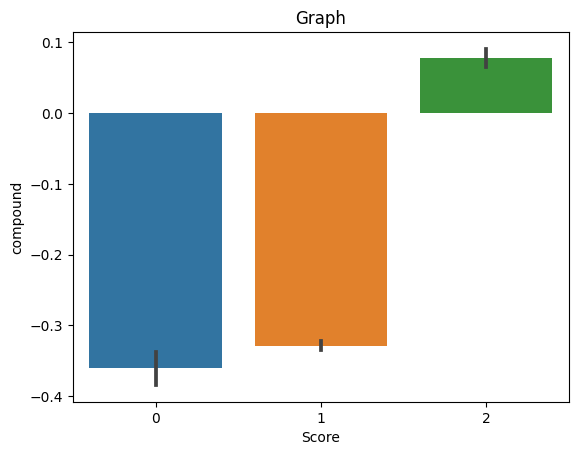

In [26]:
ax = sns.barplot(data=vaders, x='Score',y='compound')
ax.set_title('Graph')

In [29]:
vaders['Score'].value_counts().sort_index()


Score
0     1430
1    19190
2     4163
Name: count, dtype: int64